In [147]:
#!pip install yfinance

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [135]:
df =  yf.download('GLD','2008-01-01','2019-10-31')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-31,82.739998,82.830002,81.980003,82.459999,82.459999,3815600
2008-01-02,83.559998,85.139999,83.440002,84.860001,84.860001,12291100
2008-01-03,84.870003,85.940002,84.599998,85.570000,85.570000,9553900
2008-01-04,85.339996,85.550003,84.430000,85.129997,85.129997,8402200
2008-01-07,85.239998,85.260002,84.570000,84.769997,84.769997,6944300


In [136]:
df = df[['Close']]
df.head()

,Close
Date,
2007-12-31,82.459999
2008-01-02,84.860001
2008-01-03,85.570000
2008-01-04,85.129997
2008-01-07,84.769997


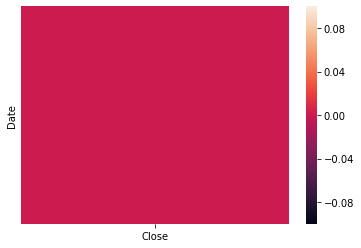

In [137]:
# checking for missing values
sns.heatmap(df.isnull(),yticklabels = False)

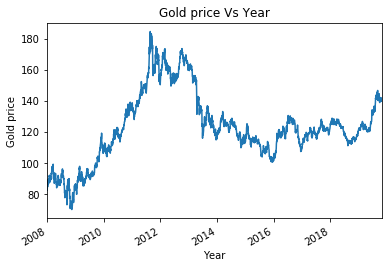

In [138]:
#graphical representation of gold price vs year
plt.title('Gold price Vs Year')  #-----title of plot
df.Close.plot()                  #---plot according to close value

# defining x& y axis
plt.xlabel('Year')
plt.ylabel('Gold price')

#show the graph
plt.show()

In [140]:
df['MA_15'] = df['Close'].rolling(window = 15).mean()

df['MA-30'] = df['Close'].rolling(window = 30).mean()
df = df.dropna()

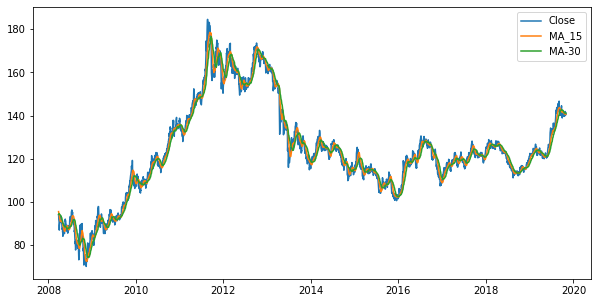

In [142]:
# visulization of moving average 15, 30 days vs  close value
plt.figure(figsize =(10,5))
plt.plot(df['Close'],label = 'Close_price')
plt.plot(df['MA_15'],label = ' moving average 15days')
plt.plot(df['MA-30'],label = 'moving average 30 days')

plt.legend(['Close','MA_15','MA-30'])
plt.show()

In [143]:
# train & test  spliting

X = df[['MA_15','MA-30']]
y = df['Close']

t = 0.8
t = int(t*len(df))
X_train,X_test,y_train,y_test = X[:t].round(4),X[t:].round(4),y[:t].round(4),y[t:].round(4)

#print(X_train,X_test,y_train,y_test)

In [144]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
df = df.dropna()
df.isnull().sum()
df = df[['Close','MA_15','MA-30']].round(2)
df.info()
reg.fit(X_train,y_train)
#y = m1* X1 + m2* X2 + C
m1 = reg.coef_[0]
m2 = reg.coef_[1]
c  = reg.intercept_

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2008-03-26 to 2019-10-30
Data columns (total 3 columns):
Close    2922 non-null float64
MA_15    2922 non-null float64
MA-30    2922 non-null float64
dtypes: float64(3)
memory usage: 91.3 KB


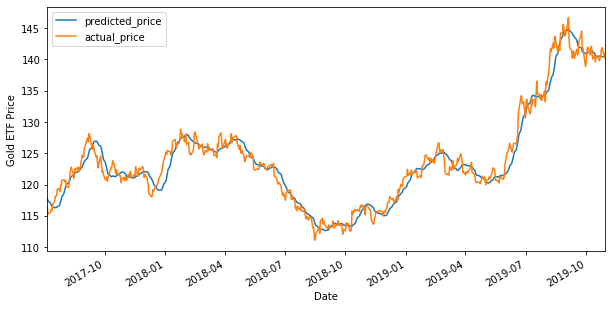

In [145]:
#visualization through actual price vs predicted price of gold
predicted_price = reg.predict(X_test) 
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  

predicted_price.plot(figsize=(10,5))  

y_test.plot()  

plt.legend(['predicted_price','actual_price'])  

plt.ylabel("Gold ETF Price")  

plt.show()

In [146]:
# accurancy -->r^2 score of the model
r2_score = reg.score(X[t:],y[t:])*100  

float("{0:.2f}".format(r2_score))

96.23